In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# Data Preparation

We will be predicting the presence of cardiovasicular disease(CVD)/heart disease using the dataset from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

The column are as follows:

**Age**: Age (years)  

**Sex**:
>0: Female  
>1: Male  


**CPainType**: Chest pain type. 
>1: typical angina  
>2: atypical angina  
>3: non-anginal pain  
>4: asymptomatic  

**RestBP**: Resting blood pressure (mm Hg)

**Chol**: Serum cholesterol (mg/dl)

**FBSugar**: Fasting blood sugar  
>1: FBS > 120 mg/dl (High)  
>0: FBS <= 120 mg/dl  (Normal)  

**RestECG**: Resting electrocardiographic results 
>0: normal  
>1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
>2: showing probable or definite left ventricular hypertrophy by Estes' criteria  

**MaxHR**: Maximum heart rate achieved (bpm)

**ExAng**: Exercised induced angina  
>1. Has exercised induced angina  
>0. Does not have exercised induced angina  

**OldPeak**: ST Depression induced by exercise relative to rest.

**STSlope**: the slope of the ST segment during peak exercise
>1: upsloping  
>2: flat  
>3: downsloping  
    
**CA**: Number of major vessels (0-3) coloured by flouroscopy

**Thal**: Presence of thalassemia, a blood disorder
>3: Normal  
>6: Fixed defect  
>7: Reversible defect  

**HeartDisease**: Diagnosis of heart disease (angiographic disease status)
>0: No: There is < 50% diameter narrowing of any major blood vessel  
>1,2,3,4: Yes: There is > 50% diameter narrowing of any major blood vessel  

In [ ]:
# obtained from V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
cleveland = pd.read_csv("processed.cleveland.data",
                names = ["Age", "Sex", "CPainType", "RestBP", "Chol","FBSugar", "RestECG","MaxHR", "ExAng" ,"OldPeak", "STSlope", "CA","Thal", "HeartDisease"]) 
va = pd.read_csv("processed.va.data",
                names = ["Age", "Sex", "CPainType", "RestBP", "Chol","FBSugar", "RestECG","MaxHR", "ExAng" ,"OldPeak", "STSlope", "CA","Thal", "HeartDisease"]) 

# obtained from Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
hungary = pd.read_csv("processed.hungarian.data",
                names = ["Age", "Sex", "CPainType", "RestBP", "Chol","FBSugar", "RestECG","MaxHR", "ExAng" ,"OldPeak", "STSlope", "CA","Thal", "HeartDisease"]) 

# obtained from University Hospital, Zurich, Switzerland William Steinbrunn, M.D. and University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
switzerland = pd.read_csv("processed.switzerland.data",
                names = ["Age", "Sex", "CPainType", "RestBP", "Chol","FBSugar", "RestECG","MaxHR", "ExAng" ,"OldPeak", "STSlope", "CA","Thal", "HeartDisease"]) 

#change to github link later or something

df = pd.concat([cleveland, va, hungary, switzerland], ignore_index = True)

df

,Age,Sex,CPainType,RestBP,Chol,FBSugar,RestECG,MaxHR,ExAng,OldPeak,STSlope,CA,Thal,HeartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
916,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
917,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
918,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [ ]:
df = df[(df != '?')] #replaces the ? with NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           920 non-null    float64
 1   Sex           920 non-null    float64
 2   CPainType     920 non-null    float64
 3   RestBP        861 non-null    object 
 4   Chol          890 non-null    object 
 5   FBSugar       830 non-null    object 
 6   RestECG       918 non-null    object 
 7   MaxHR         865 non-null    object 
 8   ExAng         865 non-null    object 
 9   OldPeak       858 non-null    object 
 10  STSlope       611 non-null    object 
 11  CA            309 non-null    object 
 12  Thal          434 non-null    object 
 13  HeartDisease  920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


There are many missing variables. Also, for many of the columns, the data type is not correct, and some categorical variables are represented by numeric values.

# Data Preprocessing

## Missing values

In [ ]:
df.isnull().sum()

Age               0
Sex               0
CPainType         0
RestBP           59
Chol             30
FBSugar          90
RestECG           2
MaxHR            55
ExAng            55
OldPeak          62
STSlope         309
CA              611
Thal            486
HeartDisease      0
dtype: int64

For the columns CA and Thal, more than half of the values are null values. Thus, we will drop these columns.

In [ ]:
df = df.drop(columns = ['CA', 'Thal'])
df

,Age,Sex,CPainType,RestBP,Chol,FBSugar,RestECG,MaxHR,ExAng,OldPeak,STSlope,HeartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115,0,0,1,92,1,0,2,1
916,70.0,1.0,4.0,140,0,1,0,157,1,2,2,3
917,72.0,1.0,3.0,160,0,NaN,2,114,0,1.6,2,0
918,73.0,0.0,3.0,160,0,0,1,121,0,0,1,1


We will remove rows with two or more missing values as well.

In [ ]:
df[df.isnull().sum(axis=1) >= 2]
#an example of the rows with 2 or more missing values

,Age,Sex,CPainType,RestBP,Chol,FBSugar,RestECG,MaxHR,ExAng,OldPeak,STSlope,HeartDisease
316,63.0,1.0,3.0,NaN,0,0,2,NaN,NaN,NaN,NaN,1
326,74.0,1.0,3.0,NaN,0,0,0,NaN,NaN,NaN,NaN,0
329,51.0,1.0,4.0,NaN,0,1,1,NaN,NaN,NaN,NaN,2
332,55.0,1.0,3.0,NaN,228,0,1,NaN,NaN,NaN,NaN,3
333,54.0,1.0,4.0,NaN,0,0,1,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
889,62.0,0.0,1.0,140,0,NaN,0,143,0,0,NaN,2
905,65.0,1.0,4.0,145,0,NaN,1,67,0,NaN,NaN,3
907,65.0,1.0,4.0,160,0,1,1,122,0,NaN,NaN,3
908,66.0,0.0,4.0,155,0,NaN,0,90,0,0,NaN,1


In [ ]:
df = df[df.isnull().sum(axis=1) < 2]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         818 non-null    int64  
 1   Age           818 non-null    float64
 2   Sex           818 non-null    float64
 3   CPainType     818 non-null    float64
 4   RestBP        816 non-null    object 
 5   Chol          810 non-null    object 
 6   FBSugar       750 non-null    object 
 7   RestECG       818 non-null    object 
 8   MaxHR         818 non-null    object 
 9   ExAng         818 non-null    object 
 10  OldPeak       818 non-null    object 
 11  STSlope       609 non-null    object 
 12  HeartDisease  818 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 83.2+ KB


There are still various missing values left. We will look at them invidually during exploratory data analysis and cleaning.

## Data type & values

Before we do exploratory data analysis, we will map the value of categorical variables to their respective representations. 

In [ ]:
df = df.astype('float64') #converts data to floats
df = df.drop(columns = 'index')
labeldf = df.copy()

#maps sex to categorical values
labeldf.loc[labeldf['Sex'] == 0 , 'Sex'] = 'F'
labeldf.loc[labeldf['Sex'] == 1, 'Sex'] = 'M'

#maps cpaintype to the categorical values
labeldf.loc[labeldf['CPainType'] == 1.0, 'CPainType'] = 'Typ'
labeldf.loc[labeldf['CPainType'] == 2.0, 'CPainType'] = 'Atyp'
labeldf.loc[labeldf['CPainType'] == 3.0, 'CPainType'] = 'NAP'
labeldf.loc[labeldf['CPainType'] == 4.0, 'CPainType'] = 'Asym'


#maps fbsugar to categorical values
labeldf.loc[labeldf['FBSugar'] == 0.0, 'FBSugar'] = 'Normal'
labeldf.loc[labeldf['FBSugar'] == 1.0, 'FBSugar'] = 'High'
#labeldf.loc[labeldf['FBSugar'] == '0', 'FBSugar'] = 'Normal'
#labeldf.loc[labeldf['FBSugar'] == '1', 'FBSugar'] = 'High'



#maps restECG to categorical values
labeldf.loc[labeldf['RestECG'] == 0.0, 'RestECG'] = 'Normal'
labeldf.loc[labeldf['RestECG'] == 1.0, 'RestECG'] = 'Abnorm'
labeldf.loc[labeldf['RestECG'] == 2.0, 'RestECG'] = 'LVH'
#labeldf.loc[labeldf['RestECG'] == '0', 'RestECG'] = 'Normal'
#labeldf.loc[labeldf['RestECG'] == '1', 'RestECG'] = 'Abnorm'
#labeldf.loc[labeldf['RestECG'] == '2', 'RestECG'] = 'LVH'


#maps exang to categorical values
labeldf.loc[labeldf['ExAng'] == 1.0, 'ExAng'] = 'True'
#labeldf.loc[labeldf['ExAng'] == '1', 'ExAng'] = 'True'
labeldf.loc[labeldf['ExAng'] == 0.0, 'ExAng'] = 'False'
#labeldf.loc[labeldf['ExAng'] == '0', 'ExAng'] = 'False'

#maps STSlope to categorical values
labeldf.loc[labeldf['STSlope'] == 1.0, 'STSlope'] = 'Up'
labeldf.loc[labeldf['STSlope'] == 2.0, 'STSlope'] = 'Flat'
labeldf.loc[labeldf['STSlope'] == 3.0, 'STSlope'] = 'Down'


#maps heartdisease to categorical values: true if value is 1,2,3 or 4, false if value is 0
labeldf.loc[labeldf['HeartDisease'] == 0 , 'HeartDisease'] = 'False'
labeldf.loc[labeldf['HeartDisease'] == 1 , 'HeartDisease'] = 'True'
labeldf.loc[labeldf['HeartDisease'] == 2 , 'HeartDisease'] = 'True'
labeldf.loc[labeldf['HeartDisease'] == 3 , 'HeartDisease'] = 'True'
labeldf.loc[labeldf['HeartDisease'] == 4 , 'HeartDisease'] = 'True'

labeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           818 non-null    float64
 1   Sex           818 non-null    object 
 2   CPainType     818 non-null    object 
 3   RestBP        816 non-null    float64
 4   Chol          810 non-null    float64
 5   FBSugar       750 non-null    object 
 6   RestECG       818 non-null    object 
 7   MaxHR         818 non-null    float64
 8   ExAng         818 non-null    object 
 9   OldPeak       818 non-null    float64
 10  STSlope       609 non-null    object 
 11  HeartDisease  818 non-null    object 
dtypes: float64(5), object(7)
memory usage: 76.8+ KB


# Exploratory Data Analysis

### Response Variable: Heart disease

In [ ]:
#presence of missing values
labeldf['HeartDisease'].isnull().sum()

0

True     451
False    367
Name: HeartDisease, dtype: int64


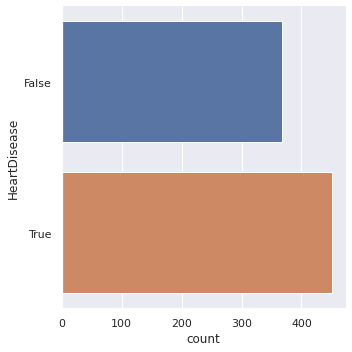

In [ ]:
print(labeldf["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = labeldf, kind = "count")

There seems to bee a relatively even spread, between true and false. There doesn't seem to be much class imbalance.

### Age

In [ ]:
#presence of missing values
labeldf['Age'].isnull().sum()

0

In [ ]:
labeldf['Age'].describe()

count    818.000000
mean      53.242054
std        9.390617
min       28.000000
25%       46.250000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

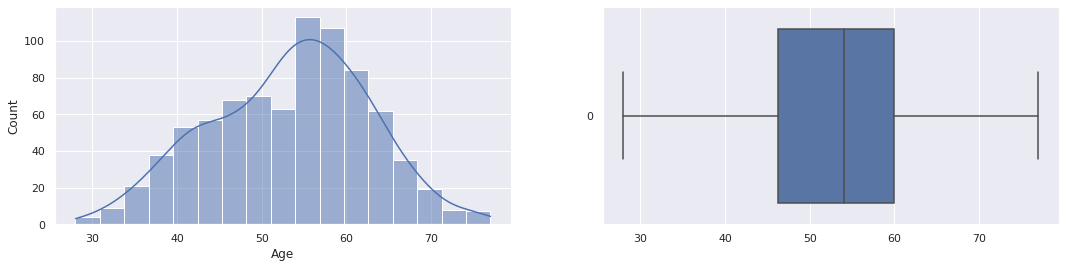

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(data = labeldf['Age'],kde = True ,ax = axes[0])
sb.boxplot(data = labeldf['Age'], orient = "h", ax = axes[1])

In this dataset, the participants seem to be quite middle-aged. This could limit the accuracy of the model for very old or very young participants

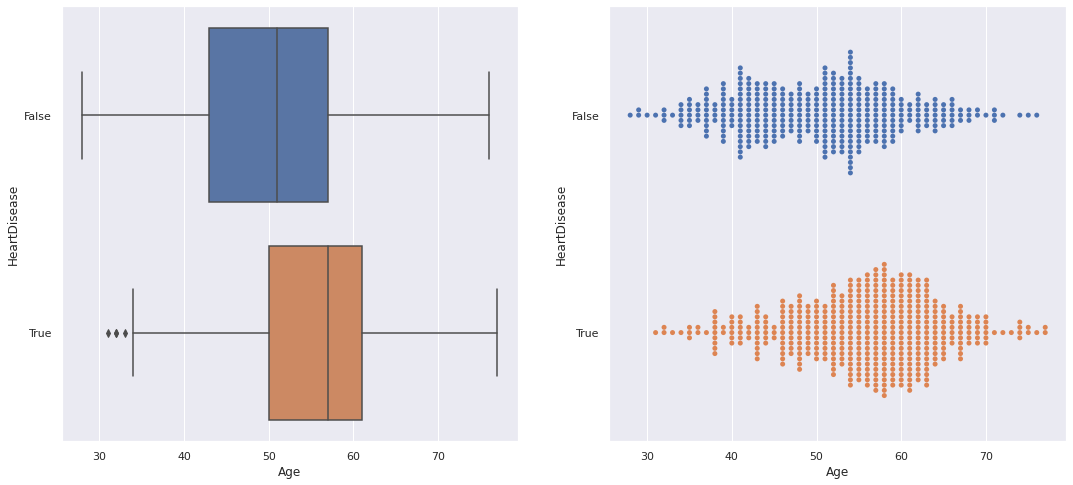

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 8))

sb.boxplot(x = 'Age',  y = 'HeartDisease', data = labeldf[['Age', 'HeartDisease']], ax = axes[0])
sb.swarmplot(x = 'Age',  y = 'HeartDisease', data = labeldf[['Age', 'HeartDisease']], ax = axes[1])

As seen, those who have heart disease tend to be of an older age, with a few outliers.

### Sex

In [ ]:
#presence of missing values
labeldf['Sex'].isnull().sum()

0

M    639
F    179
Name: Sex, dtype: int64


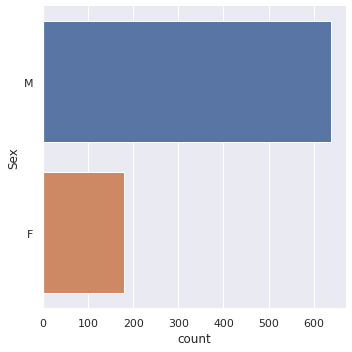

In [ ]:
print(labeldf["Sex"].value_counts())
sb.catplot(y = "Sex", data = labeldf, kind = "count")

There are more males than females in the sample, which could perhaps affect the prediction. But how does it affect heart disease?

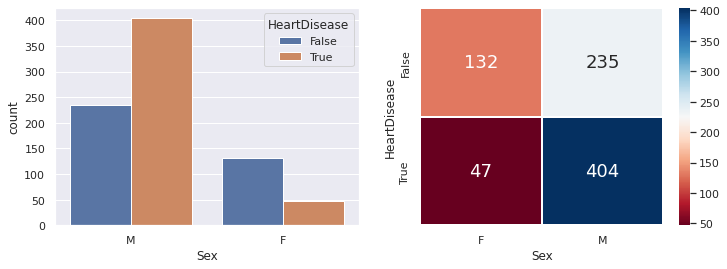

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.countplot(x='Sex',data = labeldf, hue = 'HeartDisease', ax = axes[0])

sb.heatmap(labeldf.groupby(['HeartDisease', 'Sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu", ax = axes[1])

It seems like males have a significantly higher chance of having heart disease compared to females.


### Chest pain type

In [ ]:
#presence of missing values
labeldf['CPainType'].isnull().sum()

0

Asym    451
NAP     174
Atyp    154
Typ      39
Name: CPainType, dtype: int64


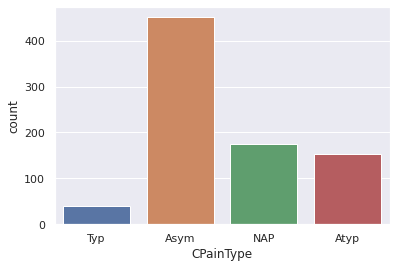

In [ ]:
print(labeldf['CPainType'].value_counts())
sb.countplot(x = 'CPainType', data = labeldf)

Most participants seem to be asymptomatic, with non-anginal pain being the second most frequent.


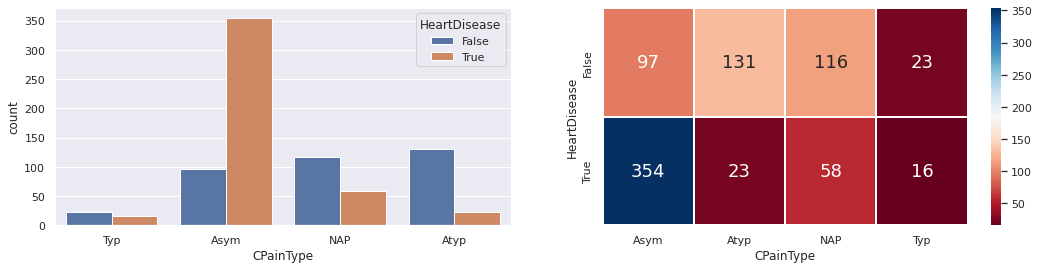

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.countplot(x='CPainType',data = labeldf, hue = 'HeartDisease', ax = axes[0])

sb.heatmap(labeldf.groupby(['HeartDisease', 'CPainType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu", ax = axes[1])

To explain this variable, there are for types of chest pains: asymptomatic, typical angina, atypical angina, and non-anginal pain. Most of the heart diseased patients have asymptomatic chest pain which suggests that they have atypical symptoms when afflicted with chest pain such as indigestion, flu.

Many participants with asymptomatic chest pain seems to have heart disease, while those with other chest pain types tend not to have heart disease. 


### Resting blood pressure

In [ ]:
#presence of missing values
labeldf['RestBP'].isnull().sum()

2

There are 2 missing values: let us look at the spread first.

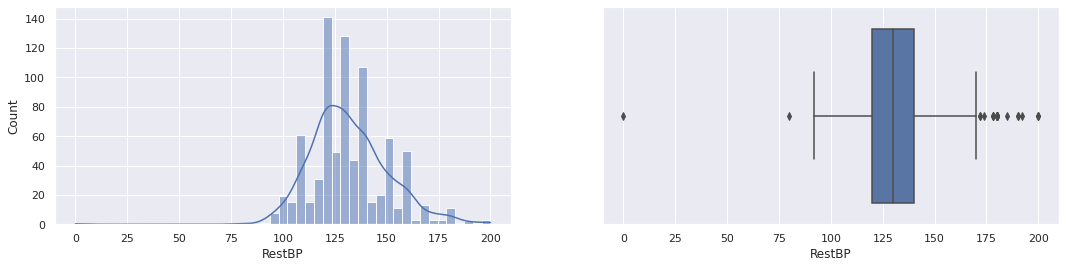

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'RestBP', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'RestBP', data = labeldf, orient = "h", ax = axes[1])

There appear to be an erroneous value, which is 0. 
We will replace that value with nan.

In [ ]:
labeldf.loc[labeldf['RestBP'] == 0 , 'RestBP'] = np.nan
df.loc[df['RestBP'] == 0 , 'RestBP'] = np.nan


#check number of missing values after imputation
labeldf['RestBP'].isnull().sum()

3

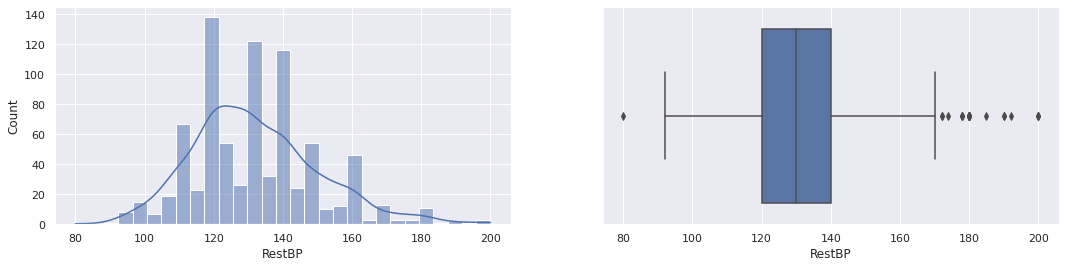

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'RestBP', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'RestBP', data = labeldf, orient = "h", ax = axes[1])

The resting blood pressure of participants generally lies between 120 to 140, which is quite high.

Blood pressure is considered normal if it is less than 120. 120-129 is considered elevated. 130 and higher is considered high blood pressure.

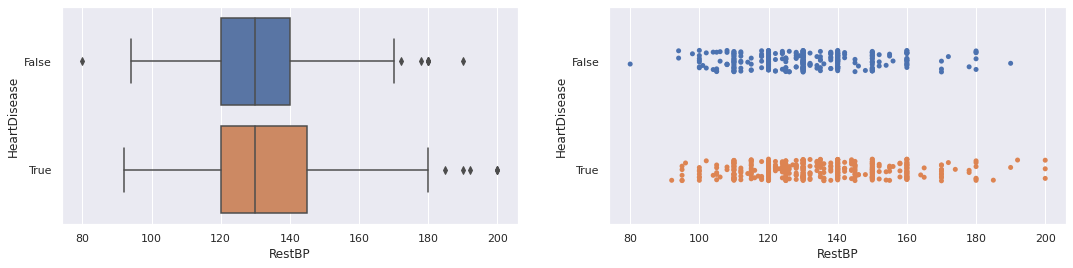

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4))

sb.boxplot(x = 'RestBP', y = 'HeartDisease', data = labeldf, ax = axes[0])
sb.stripplot(x = 'RestBP', y = 'HeartDisease', data = labeldf, ax = axes[1])


The lower quartile and median seems to be the same for both cases, while upper quartile is higher for cases that are true.

There seems to be a weak correlation between resting blood pressure and heart disease.

### Resting electrocardiographic results

In [ ]:
#presence of missing values
labeldf['RestECG'].isnull().sum()

0

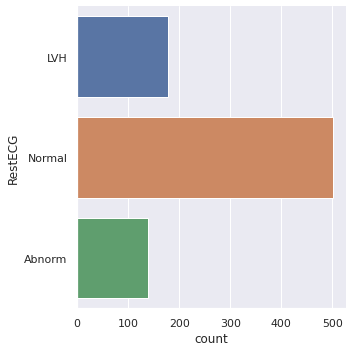

In [ ]:
sb.catplot(y = "RestECG", data = labeldf, kind = "count")

Most patients have normal ECG results.

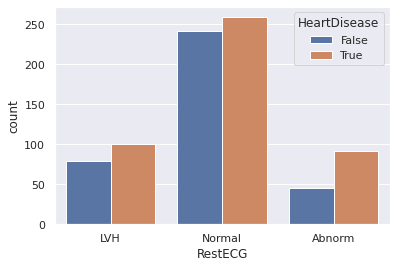

In [ ]:
sb.countplot(x='RestECG',data = labeldf, hue = 'HeartDisease')

As shown, there is a higher proportion of patients that have heart disease with ECG patterns with 'LVH' and 'Abnormal'. For some context, patients with left ventricular hypertrophy (LVH) ECG pattern have **physically clogged** arteries. This results in the heart needing to pump against higher resistance. This is reflected in the actual ECG diagram as a elevation in a particular wave.

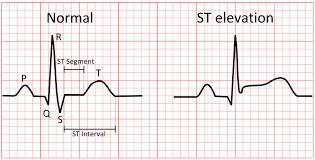

For the 'Abnorm' observation, it is an indicator of a possible heart attack or heart disease. If it is a elevation, it suggests that a heart attack has taken place while if there is a depression, it suggests that there is a possibility of **ischaemia** (heart getting not enough oxygen due to clogged arteries). 

<img src="https://c8.alamy.com/comp/HNFH7G/ecg-of-non-st-elevation-myocardial-infarction-nstemi-and-detail-of-HNFH7G.jpg" alt="drawing" width="350"/>

ECG pattern seems to be a good indicator of heartdisease.

### Exercise Induced Angina

In [ ]:
#presence of missing values
labeldf['ExAng'].isnull().sum()

0

False    491
True     327
Name: ExAng, dtype: int64


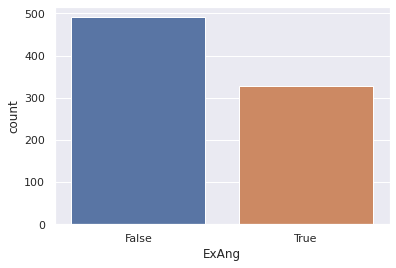

In [ ]:
print(labeldf['ExAng'].value_counts())
sb.countplot(x = 'ExAng', data = labeldf)

Most patients do not have exercised induced angina, or chest pain during exercise.

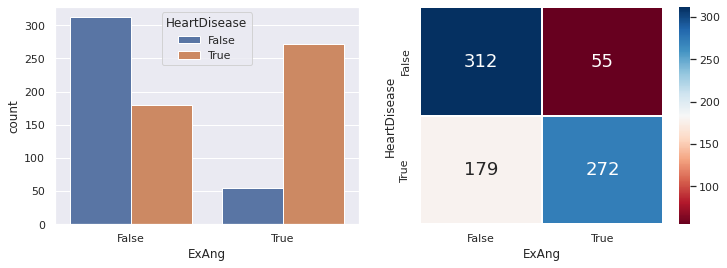

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.countplot(x='ExAng',data = labeldf, hue = 'HeartDisease', ax = axes[0])


sb.heatmap(labeldf.groupby(['HeartDisease', 'ExAng']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu", ax = axes[1])

As seen, a large proportion of those with exercise induced angina have heart disease in our dataset. Thus, it could be quite a good predictor of heart disease.

### Maximum heart rate

In [ ]:
#presence of missing values
labeldf['MaxHR'].isnull().sum()

0

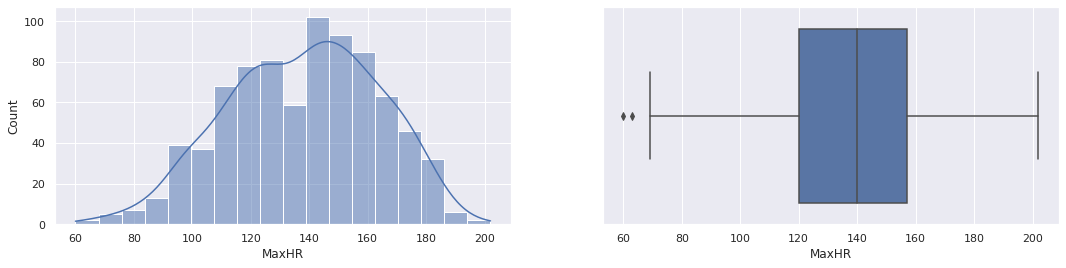

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'MaxHR', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'MaxHR', data = labeldf, orient = "h", ax = axes[1])

Maximum heart rate is generally between 133.5 to 166, which looks to be less than the normal maximum heart rate for the age range of the participants.

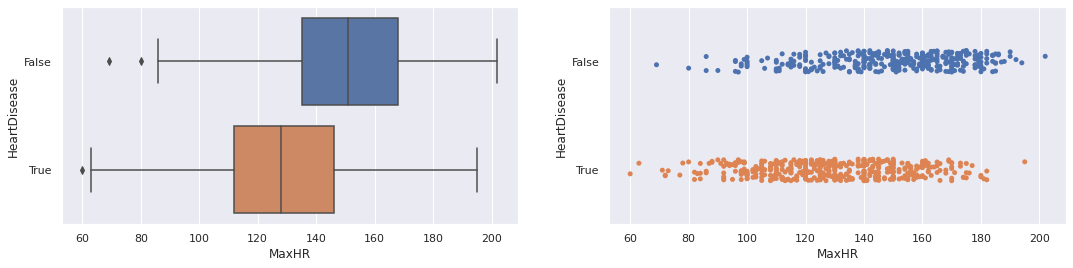

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4))

sb.boxplot(x = 'MaxHR', y = 'HeartDisease', data = labeldf, ax = axes[0])
sb.stripplot(x = 'MaxHR', y = 'HeartDisease', data = labeldf, ax = axes[1])

Maximum heart rate for participants with heart disease is significantly lower.

It seems to be a good indicator of heart disease.

### ST Depression induced by exercise relative to rest (OldPeak)

In [ ]:
#presence of missing values
labeldf['OldPeak'].isnull().sum()

0

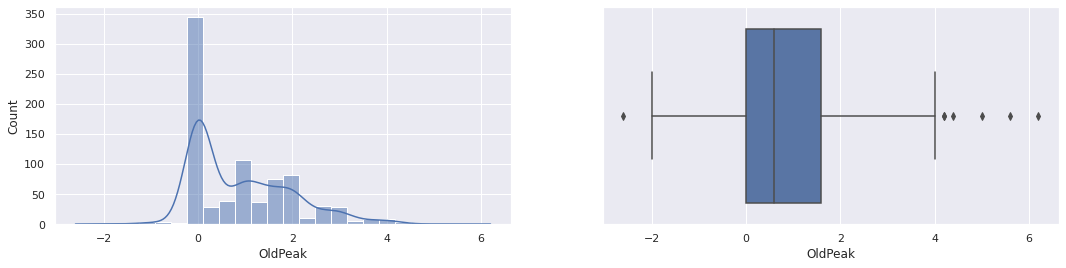

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'OldPeak', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'OldPeak', data = labeldf, orient = "h", ax = axes[1])

Oldpeak seems to mostly be between 0 to 1.6. Most of the values are 0, and there are a few outliers and negative values, which could mean that there is ST elevation induced by exercise.

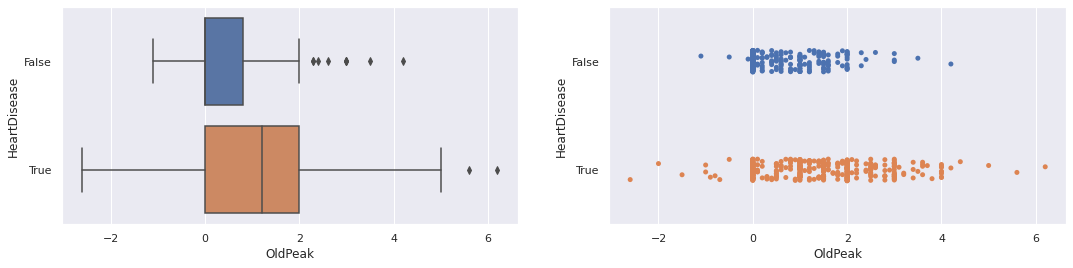

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4))

sb.boxplot(x = 'OldPeak', y = 'HeartDisease', data = labeldf, ax = axes[0])
sb.stripplot(x = 'OldPeak', y = 'HeartDisease', data = labeldf, ax = axes[1])

Old peak in participants with heart disease looks to be between 0.5 to 2.5 while participants without looks to be between 0 to 1

It seems to be a good indicator of heart disease.

### ST Slope during peak exercise

This is the slope of the ST Segment, measured during peak exercise. According to Hill, J., & Timmis, A. (2002), "the J point (the point of inflection at the junction of the S wave and ST segment) becomes depressed during exercise, with maximum depression at peak exercise. The normal ST segment during exercise therefore slopes sharply upwards."


Hill, J., & Timmis, A. (2002). Exercise tolerance testing. BMJ (Clinical research ed.), 324(7345), 1084–1087. https://doi.org/10.1136/bmj.324.7345.1084

In [ ]:
#presence of missing values
labeldf['STSlope'].isnull().sum()

209

Flat    345
Up      201
Down     63
Name: STSlope, dtype: int64


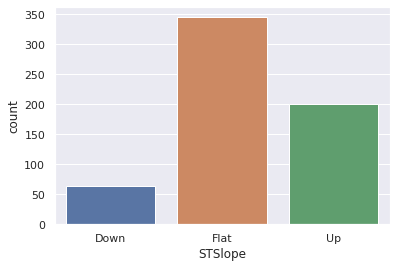

In [ ]:
print(labeldf['STSlope'].value_counts())
sb.countplot(x = 'STSlope', data = labeldf)

Most patients have an STSlope that is flat or upwards, and a significant proportion of the data is missing. 

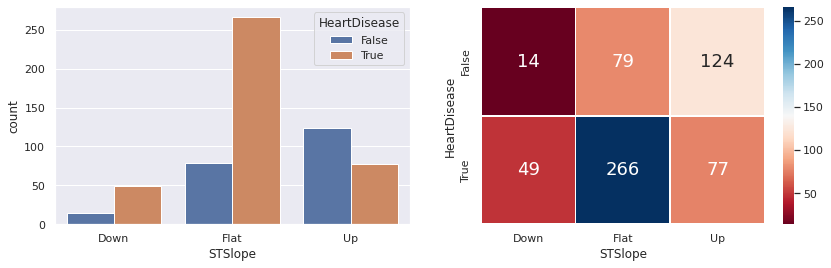

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(14, 4))

sb.countplot(x='STSlope',data = labeldf, hue = 'HeartDisease', ax = axes[0])


sb.heatmap(labeldf.groupby(['HeartDisease', 'STSlope']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu", ax = axes[1])

A large proprortion of patients with down-sloping or flat ST Slopes during peak exercise have heart disease. The inverse is true for upwards-sloping ST Slope. Despite the missing values, STSlope appears to be quite a good indicator for heart disease.

### Fasting blood sugar


In [ ]:
#presence of missing values
labeldf['FBSugar'].isnull().sum()

68

A proportion of the data is missing for this variable.

Normal    638
High      112
Name: FBSugar, dtype: int64


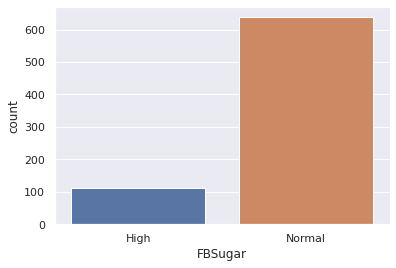

In [ ]:
print(labeldf['FBSugar'].value_counts())
sb.countplot(x = 'FBSugar', data = labeldf)

Only a small number of participants have high fasting blood sugar levels.


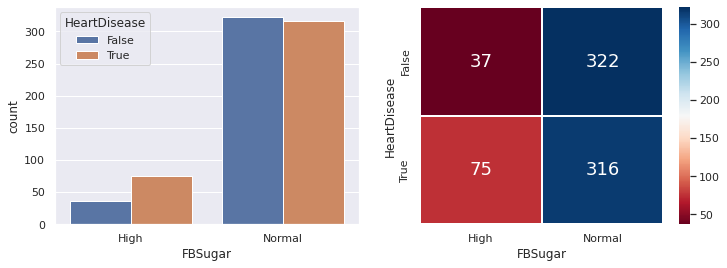

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.countplot(x='FBSugar',data = labeldf, hue = 'HeartDisease', ax = axes[0])


sb.heatmap(labeldf.groupby(['HeartDisease', 'FBSugar']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "RdBu", ax = axes[1])

A larger proportion of those with high fasting blood sugar had heart disease. It seems like a decent predictor.

### Cholesterol

In [ ]:
#presence of missing values
labeldf['Chol'].isnull().sum()

8

There seems to be a few missing values. Let us look at the distribution:

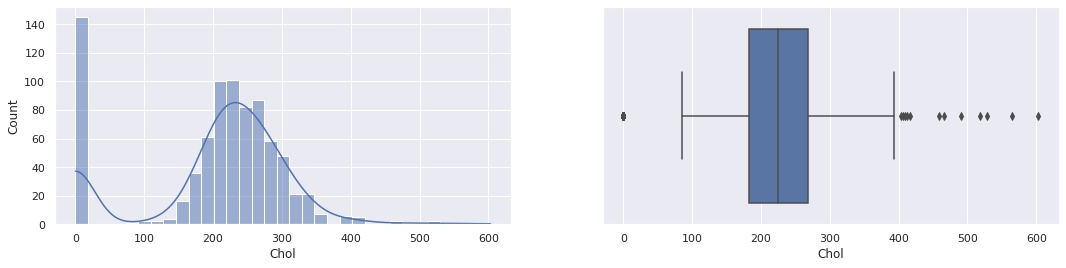

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'Chol', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'Chol', data = labeldf, orient = "h", ax = axes[1])

It appears that there are also a lot (140+) of erroneous values, as cholesterol can never be zero. We will remove these value, and look at the distribution again.

In [ ]:
labeldf.loc[labeldf['Chol'] == 0 , 'Chol'] = np.nan
df.loc[df['Chol'] == 0 , 'Chol'] = np.nan

labeldf['Chol'].isnull().sum()

153

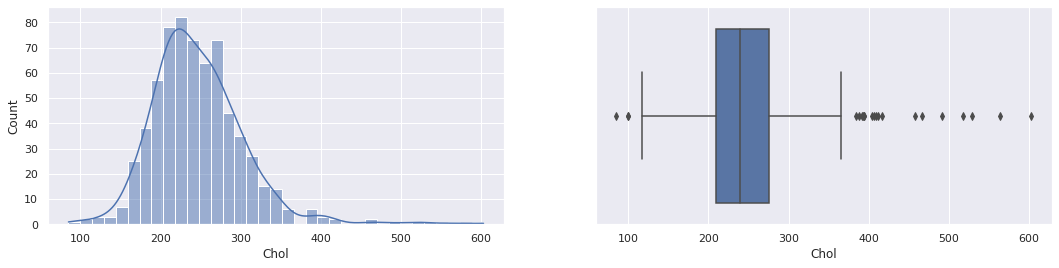

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.histplot(x = 'Chol', data = labeldf, kde = True, ax = axes[0])
sb.boxplot(x = 'Chol', data = labeldf, orient = "h", ax = axes[1])

The level of cholesterol generally lies between 211 to 275, which is considered elevated to high.

Desirable levels is under 200, borderline high is between 200 to 239, high levels is above 240.



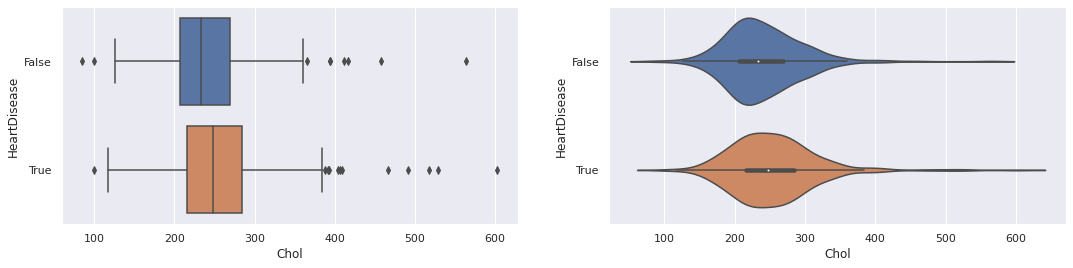

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4))

sb.boxplot(x = 'Chol', y = 'HeartDisease', data = labeldf, ax = axes[0])
sb.violinplot(x = 'Chol', y = 'HeartDisease', data = labeldf, ax = axes[1])

Cholesterol appears to be generally higher for the participants with heart disease. It looks like a relatively weaker predictor for heart disease.



### Numeric Predictors

In [ ]:
df_num = labeldf[['Age', 'RestBP', 'Chol', 'MaxHR', 'OldPeak']]
df_num.describe() 

,Age,RestBP,Chol,MaxHR,OldPeak
count,818.000000,815.000000,665.000000,818.000000,818.000000
mean,53.242054,132.051534,246.935338,137.886308,0.913570
std,9.390617,18.353739,58.150799,25.753573,1.098067
min,28.000000,80.000000,85.000000,60.000000,-2.600000
25%,46.250000,120.000000,210.000000,120.000000,0.000000
50%,54.000000,130.000000,240.000000,140.000000,0.600000
75%,60.000000,140.000000,276.000000,157.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


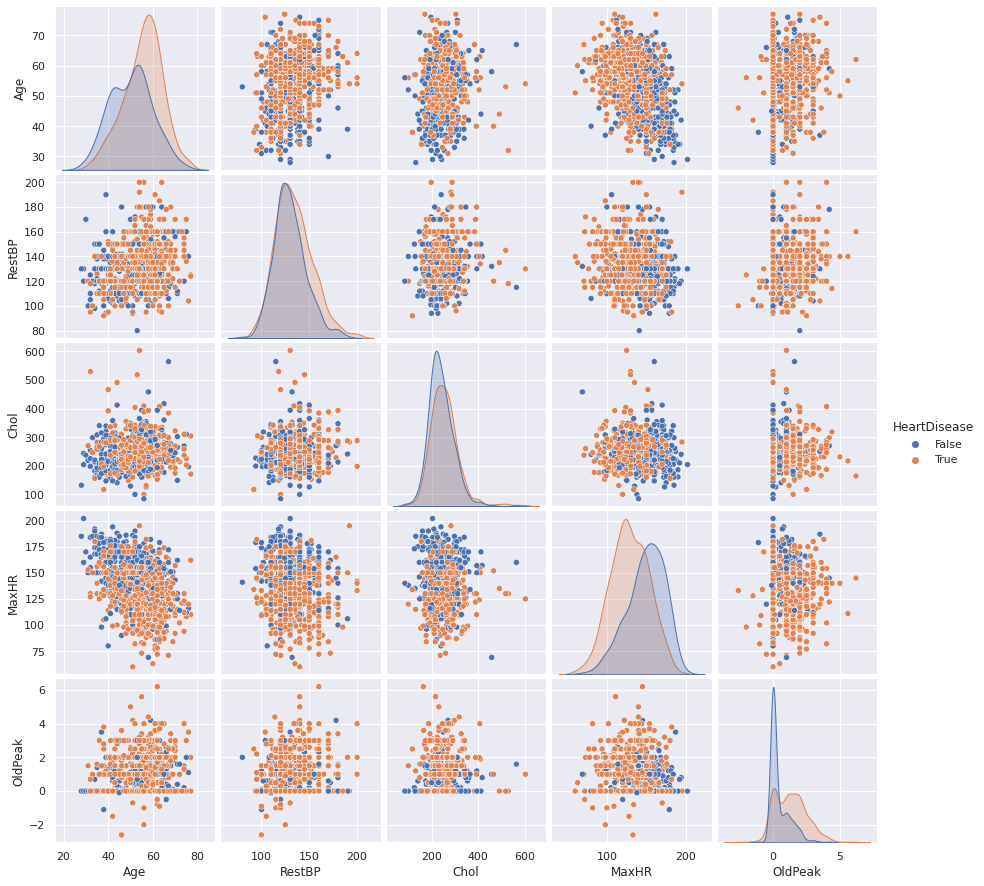

In [ ]:
sb.pairplot(data = labeldf[['Age', 'RestBP', 'Chol', 'MaxHR', 'OldPeak', 'HeartDisease' ]], hue = 'HeartDisease')

### Categorical Predictors

In [ ]:
df_cat = labeldf[['Sex','CPainType', 'FBSugar', 'RestECG', 'ExAng' , 'STSlope']]
df_cat.describe()

,Sex,CPainType,FBSugar,RestECG,ExAng,STSlope
count,818,818,750,818,818,609
unique,2,4,2,3,2,3
top,M,Asym,Normal,Normal,False,Flat
freq,639,451,638,501,491,345


### Correlation heatmap

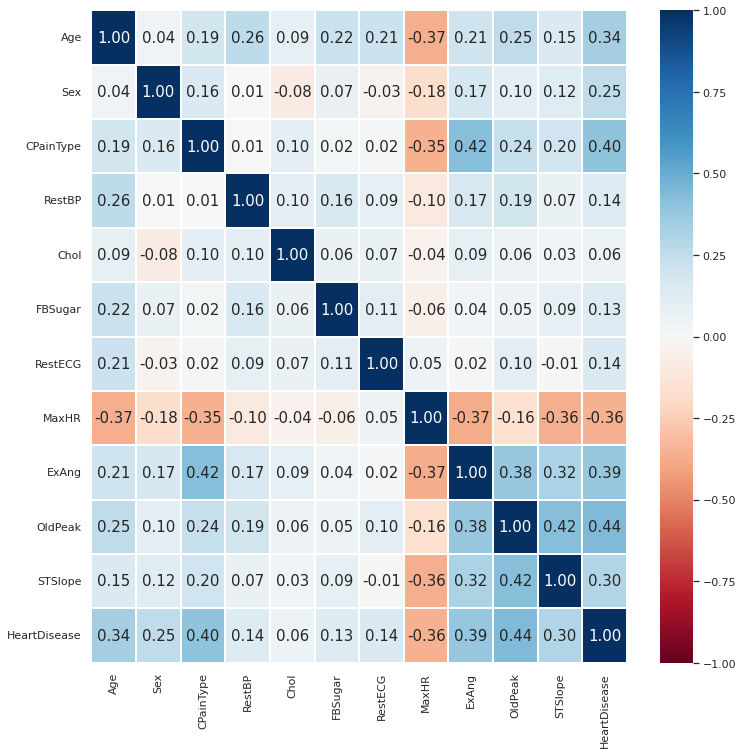

In [ ]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 15}, cmap = "RdBu")

Looking at the correlation heatmap and the numeric pair-plot, we can see that age has a negative correlation with maximum heart rate. As age increases, maximum heart rate tends to decrease.

Some individual bi-variate relations worth exploring could be:
- Chest pain type and exercise induced angina
- Chest pain type and maximum heart rate
- ST Slope and maximum heart rate
- Oldpeak and STSlope

Because these variables are categorical, the heatmap may not give the full picture. 

## Bivariate Exploration

**Chest Pain Type and Exercise Induced Angina**

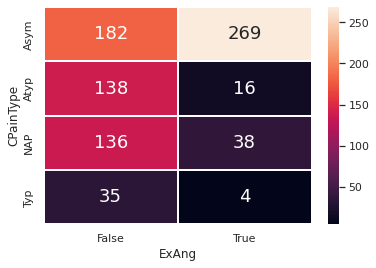

In [ ]:
sb.heatmap(labeldf.groupby(['CPainType', 'ExAng']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18})

Evidently, a significant proportion of those who suffer from exercise induced angina have asymptomatic chest pain type.

**Chest Pain Type and Maximum Heart Rate**

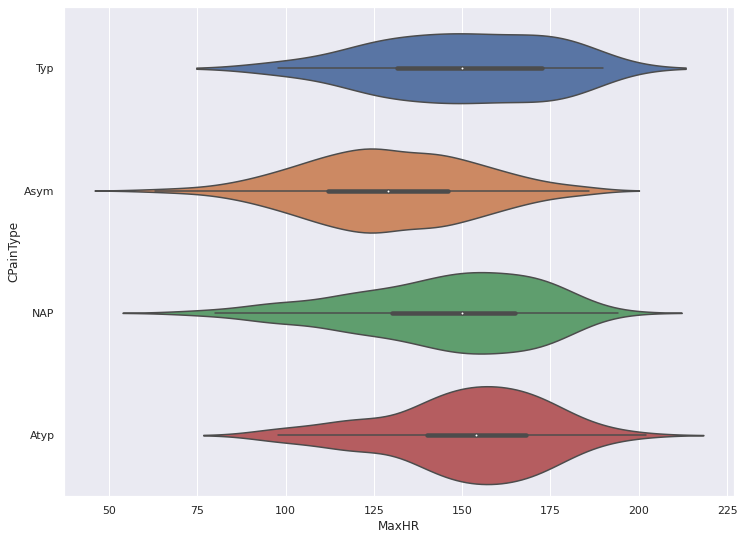

In [ ]:
f = plt.figure(figsize=(12, 9))
sb.violinplot(x = 'MaxHR',  y = 'CPainType',data = labeldf[['MaxHR', 'CPainType']])

Those with asymptomatic chest pain type appear to have a slightly lower maximum heart rate than those with other chest pain types.

**ST Slope and Maximum Heart Rate**

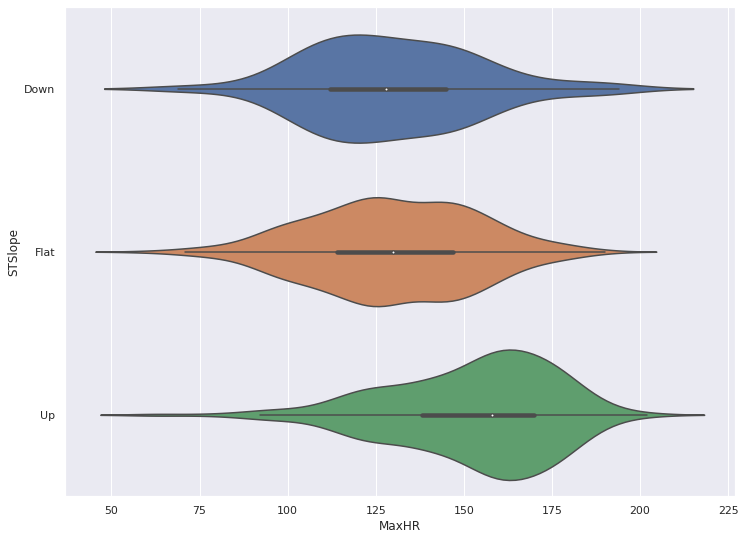

In [ ]:
f = plt.figure(figsize=(12, 9))
sb.violinplot(x = 'MaxHR',  y = 'STSlope', data = labeldf[['MaxHR', 'STSlope']])

Those who have an upward-sloping ST Slope segment during peak exercise tend to have a higher maximum heart rate.

**Exercise induced ST Depression (OldPeak) and STSlope**

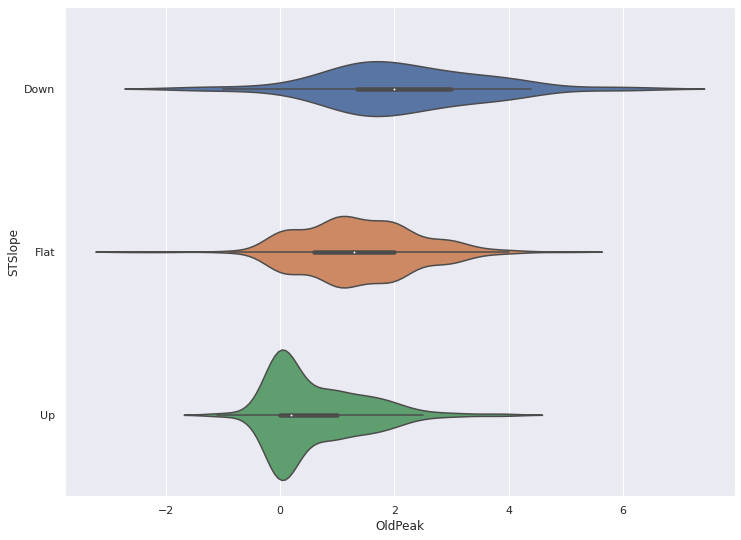

In [ ]:
f = plt.figure(figsize=(12, 9))
sb.violinplot(x = 'OldPeak',  y = 'STSlope',data = labeldf[['OldPeak', 'STSlope','HeartDisease']])

Those with upward sloping ST slopes tend to have less exercise-induced ST depression (oldpeak value 0) than the other 2 categories.

But what about the patients with heart disease?

In [ ]:
# only select rows with positive heart diseae

labeldf2 = labeldf[labeldf['HeartDisease'] == 'True' ][["Age", "Sex", "CPainType", "RestBP", "Chol","FBSugar", "RestECG","MaxHR", "ExAng" ,"OldPeak", "STSlope", "HeartDisease"]] 

labeldf2

,Age,Sex,CPainType,RestBP,Chol,FBSugar,RestECG,MaxHR,ExAng,OldPeak,STSlope,HeartDisease
1,67.0,M,Asym,160.0,286.0,Normal,LVH,108.0,True,1.5,Flat,True
2,67.0,M,Asym,120.0,229.0,Normal,LVH,129.0,True,2.6,Flat,True
6,62.0,F,Asym,140.0,268.0,Normal,LVH,160.0,False,3.6,Down,True
8,63.0,M,Asym,130.0,254.0,Normal,LVH,147.0,False,1.4,Flat,True
9,53.0,M,Asym,140.0,203.0,High,LVH,155.0,True,3.1,Down,True
...,...,...,...,...,...,...,...,...,...,...,...,...
812,69.0,M,Asym,135.0,NaN,Normal,Normal,130.0,False,0.0,Flat,True
813,70.0,M,Asym,115.0,NaN,Normal,Abnorm,92.0,True,0.0,Flat,True
814,70.0,M,Asym,140.0,NaN,High,Normal,157.0,True,2.0,Flat,True
816,73.0,F,NAP,160.0,NaN,Normal,Abnorm,121.0,False,0.0,Up,True


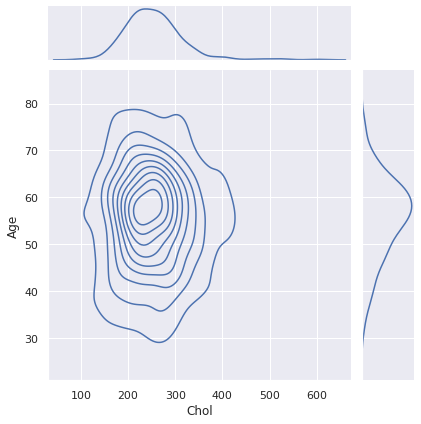

In [ ]:

sb.jointplot(data=labeldf2,
                x='Chol',
                y='Age',
                kind='kde',
                
                )

Plot of cholesterol against age of patients with heart disease.

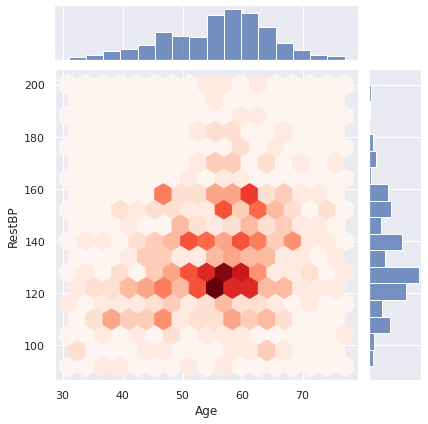

In [ ]:

sb.jointplot(data=labeldf2,
              x='Age',
              y='RestBP',
              kind='hex',
              cmap='Reds'
           
              )

Plot of resting blood pressure against age of patients with heart disease.

# Imputation of missing values with KNNImputer

In [ ]:
df.isnull().sum()

Age               0
Sex               0
CPainType         0
RestBP            3
Chol            153
FBSugar          68
RestECG           0
MaxHR             0
ExAng             0
OldPeak           0
STSlope         209
HeartDisease      0
dtype: int64

There are 2 numeric missing variables, and 2 categorical missing variables. 
We will fill in the missing values with KNN immputation. This will fill in the missing values based on their nearest neighbours: data points which are the most similar to them, by euclidean distance. 

Since we have a mix of numeric and categorical variables in our dataset, the distance might be biased towards the numeric variables, since it uses the absolute distance. To overcome this, we have to use minmaxscaler to normalize the data.

In [ ]:
#Use minmaxscaler to scale the data first
labeldf_filled = labeldf.copy()
df_scaled = df.copy()
df_scaled = df_scaled.drop(columns = ['HeartDisease'])  #drops response variable: we will not be using this to predict imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,Age,Sex,CPainType,RestBP,Chol,FBSugar,RestECG,MaxHR,ExAng,OldPeak,STSlope,HeartDisease
0,0.714286,1.0,0.000000,0.541667,0.285714,1.0,1.0,0.633803,0.0,0.556818,1.0,0.00
1,0.795918,1.0,1.000000,0.666667,0.388031,0.0,1.0,0.338028,1.0,0.465909,0.5,0.50
2,0.795918,1.0,1.000000,0.333333,0.277992,0.0,1.0,0.485915,1.0,0.590909,0.5,0.25
3,0.183673,1.0,0.666667,0.416667,0.318533,0.0,0.0,0.894366,0.0,0.693182,1.0,0.00
4,0.265306,0.0,0.333333,0.416667,0.229730,0.0,1.0,0.788732,0.0,0.454545,0.0,0.00


### Imputation of categorical variables: FBSugar and STSlope

For the categorical data, we will impute it based on the nearest neighbour: each missing value will be assigned to the category of the closest data-point to it.

In [ ]:
#Using KNNImputer on the normalized data:
from sklearn.impute import KNNImputer
imputer_cat = KNNImputer(n_neighbors=1)

df_cat = df_scaled.copy()

#performs imputation 
df_cat = pd.DataFrame(imputer_cat.fit_transform(df_cat),columns = df_cat.columns)

#transforms the data back to the original values after imputation
df_cat = pd.DataFrame(scaler.inverse_transform(df_cat),columns = df_cat.columns)

#fills in dataframe
df['FBSugar'].fillna(df_cat['FBSugar'], inplace=True)

df['STSlope'].fillna(df_cat['STSlope'], inplace=True)

#fills in the labeled dataframe as well
labeldf_filled['FBSugar'].fillna(df['FBSugar'], inplace = True)
labeldf_filled.loc[labeldf_filled['FBSugar'] == 0.0, 'FBSugar'] = 'Normal'
labeldf_filled.loc[labeldf_filled['FBSugar'] == 1.0, 'FBSugar'] = 'High'


labeldf_filled['STSlope'].fillna(df['STSlope'], inplace = True)
labeldf_filled.loc[labeldf_filled['STSlope'] == 1.0, 'STSlope'] = 'Up'
labeldf_filled.loc[labeldf_filled['STSlope'] == 2.0, 'STSlope'] = 'Flat'
labeldf_filled.loc[labeldf_filled['STSlope'] == 3.0, 'STSlope'] = 'Down'
labeldf_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           818 non-null    float64
 1   Sex           818 non-null    object 
 2   CPainType     818 non-null    object 
 3   RestBP        815 non-null    float64
 4   Chol          665 non-null    float64
 5   FBSugar       818 non-null    object 
 6   RestECG       818 non-null    object 
 7   MaxHR         818 non-null    float64
 8   ExAng         818 non-null    object 
 9   OldPeak       818 non-null    float64
 10  STSlope       818 non-null    object 
 11  HeartDisease  818 non-null    object 
dtypes: float64(5), object(7)
memory usage: 76.8+ KB


Comparing the distribution before and after imputation for FBSugar:

[Text(0.5, 1.0, 'After')]

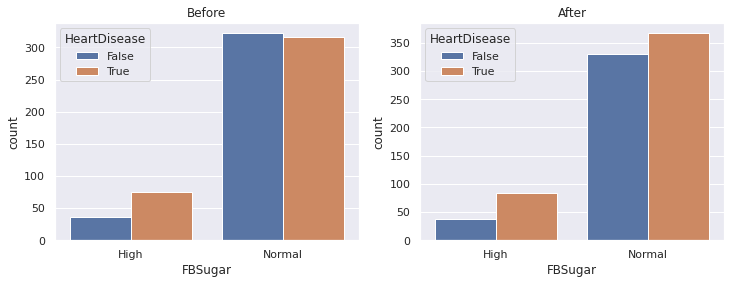

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.countplot(x='FBSugar',data = labeldf, hue = 'HeartDisease', ax = axes[0]).set(title='Before')

sb.countplot(x='FBSugar',data = labeldf_filled, hue = 'HeartDisease', ax = axes[1]).set(title='After')


Comparing distribution before and after imputation for STSlope:

[Text(0.5, 1.0, 'After')]

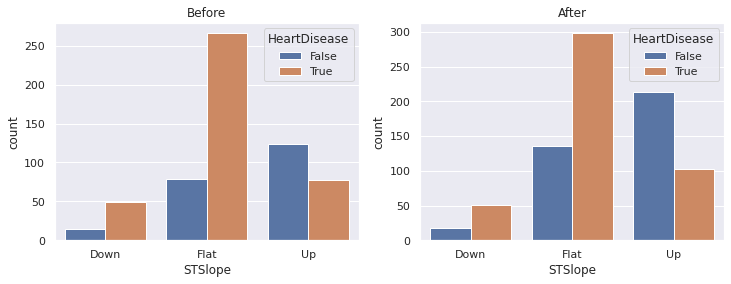

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.countplot(x='STSlope',data = labeldf, hue = 'HeartDisease', ax = axes[0]).set(title='Before')

sb.countplot(x='STSlope',data = labeldf_filled, hue = 'HeartDisease', ax = axes[1]).set(title='After')


### Imputation of Numeric variables: RestBP and Chol

For numeric variables, we will use the mean of the three nearest neighbours for imputation.

In [ ]:
imputer_num = KNNImputer(n_neighbors=3)

df_num = df_scaled.copy()

#performs imputation 
df_num = pd.DataFrame(imputer_num.fit_transform(df_num),columns = df_num.columns)

#transforms the data back to the original values after imputation
df_num = pd.DataFrame(scaler.inverse_transform(df_num),columns = df_num.columns)

#fills in dataframe
df['RestBP'].fillna(df_num['RestBP'], inplace=True)
df['Chol'].fillna(df_num['Chol'], inplace=True)

#fills in labelled dataframe as well
labeldf_filled['RestBP'].fillna(df['RestBP'], inplace=True)
labeldf_filled['Chol'].fillna(df['Chol'], inplace=True)

labeldf_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           818 non-null    float64
 1   Sex           818 non-null    object 
 2   CPainType     818 non-null    object 
 3   RestBP        818 non-null    float64
 4   Chol          818 non-null    float64
 5   FBSugar       818 non-null    object 
 6   RestECG       818 non-null    object 
 7   MaxHR         818 non-null    float64
 8   ExAng         818 non-null    object 
 9   OldPeak       818 non-null    float64
 10  STSlope       818 non-null    object 
 11  HeartDisease  818 non-null    object 
dtypes: float64(5), object(7)
memory usage: 76.8+ KB


Comparing the distribution before and after for RestBP:



[Text(0.5, 1.0, 'After')]

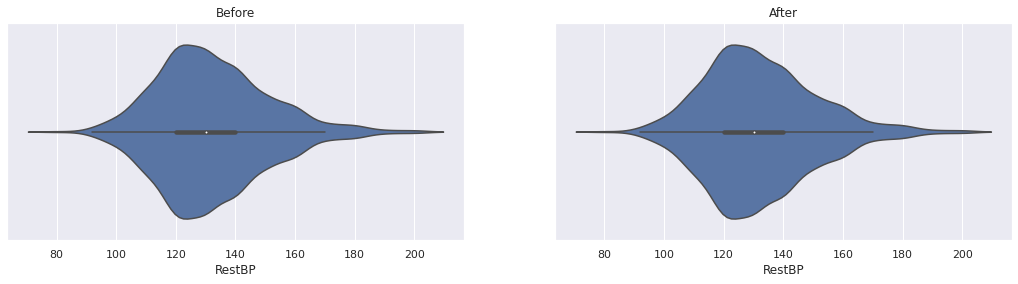

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.violinplot(x = 'RestBP', data = labeldf_filled, kde = True, ax = axes[0]).set(title='Before')
sb.violinplot(x = 'RestBP', data = labeldf_filled, kde = True, ax = axes[1]).set(title='After')

Comparing the distribution before and after for Chol:

[Text(0.5, 1.0, 'After')]

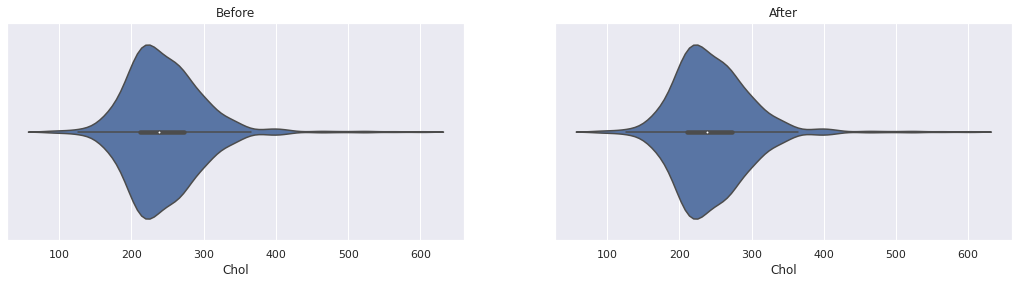

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))

sb.violinplot(x = 'Chol', data = labeldf_filled, kde = True, ax = axes[0]).set(title='Before')
sb.violinplot(x = 'Chol', data = labeldf_filled, kde = True, ax = axes[1]).set(title='After')

# Machine Learning

### Encoding of categorical variables

One-hot encoding of the nominal categorical values: Sex, CPainType, ExAng and STSlope. While they are label-encoded in the original data, using that encoding would imply that there is an ordering to these data, when in reality there are none. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors
df_cat_nom = labeldf_filled[['Sex','CPainType', 'STSlope']]
ohe.fit(df_cat_nom)
df_cat_nom_ohe = pd.DataFrame(ohe.transform(df_cat_nom).toarray(), 
                                  columns = ohe.get_feature_names_out(df_cat_nom.columns))
df_cat_nom_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_F           818 non-null    float64
 1   Sex_M           818 non-null    float64
 2   CPainType_Asym  818 non-null    float64
 3   CPainType_Atyp  818 non-null    float64
 4   CPainType_NAP   818 non-null    float64
 5   CPainType_Typ   818 non-null    float64
 6   STSlope_Down    818 non-null    float64
 7   STSlope_Flat    818 non-null    float64
 8   STSlope_Up      818 non-null    float64
dtypes: float64(9)
memory usage: 57.6 KB


For the variables RestECG and FBSugar, the values are already encoded by category in the original dataset. 

These variables are ordinal, and ordered by increasing severity


*   For RestECG: 
    - 0 means the resting electrocardiographic result of the patient is **Normal**
    - 1 means that the patient has **ST-T wave abnormality** (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2 means the patient shows probable or definite **left ventricular hypertrophy by Estes' criteria**
*   For FBSugar: 
    - 0 means fasting blood sugar is at a **normal** level (FBS <= 120 mg/dl) 
    - 1 means fasting blood sugar is **high** ((FBS > 120 mg/dl)

*   For ExAng:
    - 0 means there is **no exercise induced angina**
    - 1 means there is **exercise induced angina**


In [ ]:
df_cat_ord = df[['RestECG', 'FBSugar', 'ExAng']]
df_cat_ord

,RestECG,FBSugar,ExAng
0,2.0,1.0,0.0
1,2.0,0.0,1.0
2,2.0,0.0,1.0
3,0.0,0.0,0.0
4,2.0,0.0,0.0
...,...,...,...
813,1.0,0.0,1.0
814,0.0,1.0,1.0
815,2.0,0.0,0.0
816,1.0,0.0,0.0


Concatenating all the variables together:

In [ ]:
df_num_final = labeldf_filled[['Age', 'RestBP', 'Chol', 'MaxHR', 'OldPeak']] #numeric variables
df_res = labeldf['HeartDisease'] #response 

df_final = pd.concat([df_num_final, df_cat_ord, df_cat_nom_ohe, df_res], 
                           sort = False, axis = 1).reindex(index=df_num.index)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             818 non-null    float64
 1   RestBP          818 non-null    float64
 2   Chol            818 non-null    float64
 3   MaxHR           818 non-null    float64
 4   OldPeak         818 non-null    float64
 5   RestECG         818 non-null    float64
 6   FBSugar         818 non-null    float64
 7   ExAng           818 non-null    float64
 8   Sex_F           818 non-null    float64
 9   Sex_M           818 non-null    float64
 10  CPainType_Asym  818 non-null    float64
 11  CPainType_Atyp  818 non-null    float64
 12  CPainType_NAP   818 non-null    float64
 13  CPainType_Typ   818 non-null    float64
 14  STSlope_Down    818 non-null    float64
 15  STSlope_Flat    818 non-null    float64
 16  STSlope_Up      818 non-null    float64
 17  HeartDisease    818 non-null    obj

### Decision Tree Classifier

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score


# Extract Response and Predictors
y = pd.DataFrame(df_final['HeartDisease'])
X = pd.DataFrame(df_final.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


scoreslist = []

We will first use a decision tree to predict heartdisease: with a tentative max_depth value of 4.

[Text(0.4732142857142857, 0.9, 'CPainType_Asym <= 0.5\ngini = 0.498\nsamples = 613\nvalue = [289, 324]\nclass = HeartDisease'),
 Text(0.23214285714285715, 0.7, 'STSlope_Up <= 0.5\ngini = 0.375\nsamples = 284\nvalue = [213, 71]\nclass = NoHeartDisease'),
 Text(0.14285714285714285, 0.5, 'Sex_F <= 0.5\ngini = 0.487\nsamples = 131\nvalue = [76, 55]\nclass = NoHeartDisease'),
 Text(0.07142857142857142, 0.3, 'Age <= 42.5\ngini = 0.497\nsamples = 93\nvalue = [43, 50]\nclass = HeartDisease'),
 Text(0.03571428571428571, 0.1, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = NoHeartDisease'),
 Text(0.10714285714285714, 0.1, 'gini = 0.48\nsamples = 80\nvalue = [32, 48]\nclass = HeartDisease'),
 Text(0.21428571428571427, 0.3, 'MaxHR <= 112.0\ngini = 0.229\nsamples = 38\nvalue = [33, 5]\nclass = NoHeartDisease'),
 Text(0.17857142857142858, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = HeartDisease'),
 Text(0.25, 0.1, 'gini = 0.111\nsamples = 34\nvalue = [32, 2]\nclass = NoHeartDisease

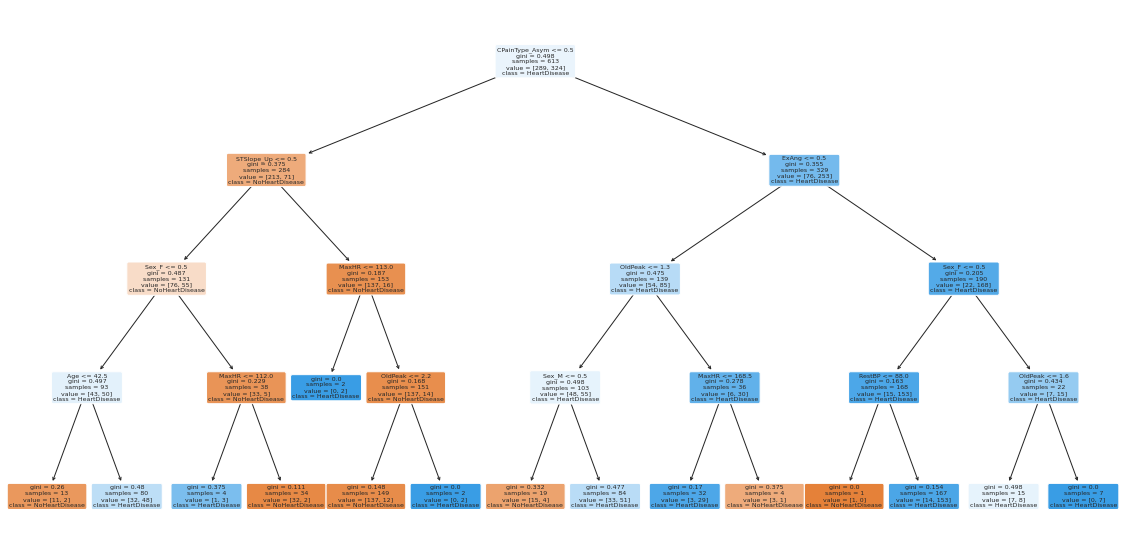

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4, random_state = 42)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(20,10))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NoHeartDisease","HeartDisease"])

Helper function to print confusion matrix and scores for the tests.

In [ ]:
def printScores(predictor, X, y , name, traintest, scoreslist):
    # Predict the Response corresponding to Predictors
    y_pred = predictor.predict(X)
    y_pred_prob = predictor.predict_proba(X)

    cm = confusion_matrix(y, y_pred)
    tp = cm[1][1] # True Positives 
    fp = cm[0][1] # False Positives 
    tn = cm[0][0] # True Negatives 
    fn = cm[1][0] # False Negatives 

    # Print the Classification Accuracy and F1 scores
    accuracy = predictor.score(X, y)
    f1score = (tp/(tp + 0.5*(fp + fn)))
    auc_score = roc_auc_score(y, y_pred_prob[:,1])


    print("Accuracy:\t", accuracy)
    print("F1:\t \t", f1score)
    print("ROC_AUC:\t", auc_score)
    print()

    print("TPR:\t", (tp/(tp + fn)))
    print("TNR:\t", (tn/(tn + fp)))
    print()

    print("FPR:\t", (fp/(tn + fp)))
    print("FNR:\t", (fn/(tp + fn)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y, y_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    #saves scores to scoreslist
    scoreslist.append({'Name': name, 'traintest': traintest, 'Accuracy': accuracy, 'F1': f1score, 'ROC_AUC': auc_score})

Train Data
Accuracy:	 0.8189233278955954
F1:	 	 0.8451882845188284
ROC_AUC:	 0.8851403306420608

TPR:	 0.9351851851851852
TNR:	 0.6885813148788927

FPR:	 0.31141868512110726
FNR:	 0.06481481481481481


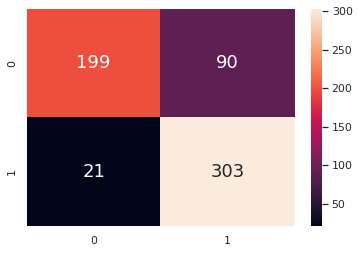

In [ ]:
print("Train Data")
printScores(dectree, X_train, y_train, 'Dectree', 'Train', scoreslist)

Test Data
Accuracy:	 0.7853658536585366
F1:	 	 0.8394160583941606
ROC_AUC:	 0.8302543912780134

TPR:	 0.905511811023622
TNR:	 0.5897435897435898

FPR:	 0.41025641025641024
FNR:	 0.09448818897637795


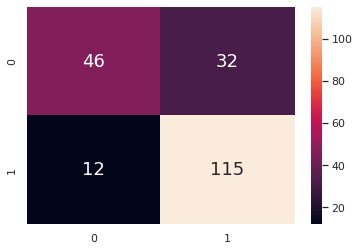

In [ ]:
print("Test Data")
printScores(dectree, X_test, y_test, 'Dectree', 'Test',scoreslist)

We can perhaps improve the accuracy of the data using hyperparameter tuning: what depth of tree is the best? To do this, we will do cross-validation with gridsearchCV.

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on
param_grid = {'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(DecisionTreeClassifier(random_state=42),   # the model family
                      param_grid,                 # the search grid
                      cv = 4,                     # 4-fold cross-validation
                      scoring = 'roc_auc')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HeartDisease.ravel())

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='roc_auc')

In [ ]:
# Fetch the best set of Hyper-parameters
print(hpGrid.best_params_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

{'max_depth': 3}
0.8173307519213786


[Text(0.5, 0.875, 'CPainType_Asym <= 0.5\ngini = 0.498\nsamples = 613\nvalue = [289, 324]\nclass = HeartDisease'),
 Text(0.25, 0.625, 'STSlope_Up <= 0.5\ngini = 0.375\nsamples = 284\nvalue = [213, 71]\nclass = NoHeartDisease'),
 Text(0.125, 0.375, 'Sex_F <= 0.5\ngini = 0.487\nsamples = 131\nvalue = [76, 55]\nclass = NoHeartDisease'),
 Text(0.0625, 0.125, 'gini = 0.497\nsamples = 93\nvalue = [43, 50]\nclass = HeartDisease'),
 Text(0.1875, 0.125, 'gini = 0.229\nsamples = 38\nvalue = [33, 5]\nclass = NoHeartDisease'),
 Text(0.375, 0.375, 'OldPeak <= 2.2\ngini = 0.187\nsamples = 153\nvalue = [137, 16]\nclass = NoHeartDisease'),
 Text(0.3125, 0.125, 'gini = 0.168\nsamples = 151\nvalue = [137, 14]\nclass = NoHeartDisease'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = HeartDisease'),
 Text(0.75, 0.625, 'ExAng <= 0.5\ngini = 0.355\nsamples = 329\nvalue = [76, 253]\nclass = HeartDisease'),
 Text(0.625, 0.375, 'OldPeak <= 1.3\ngini = 0.475\nsamples = 139\nvalue = [54, 

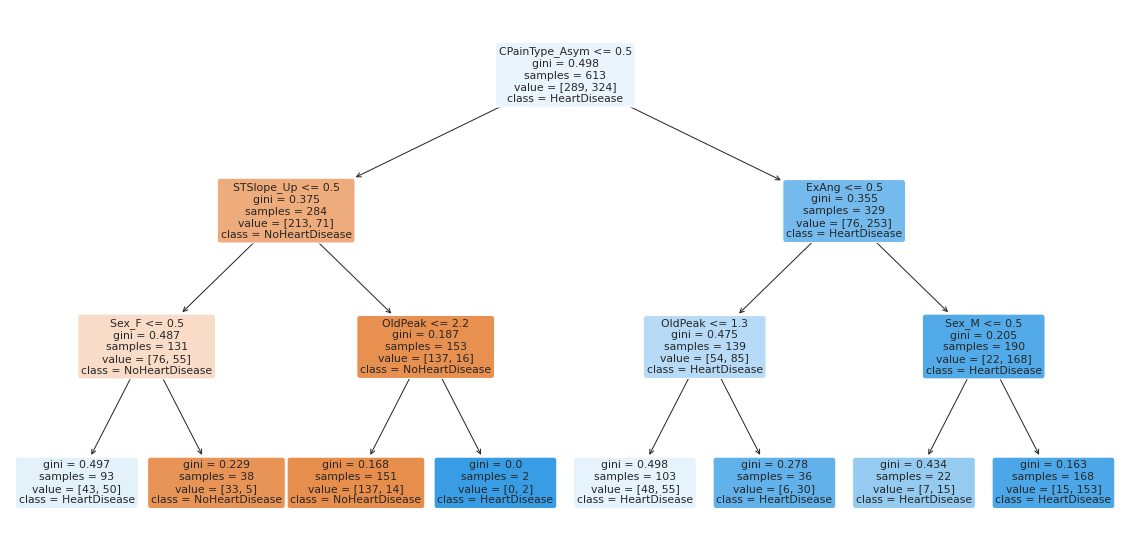

In [ ]:
# decision tree of depth recommended by the classifier
dectreeCV = DecisionTreeClassifier(max_depth = hpGrid.best_params_['max_depth'], random_state=42)  
dectreeCV.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(20,10))
plot_tree(dectreeCV, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NoHeartDisease","HeartDisease"])

From the tree itself, we can see that some important factors in predicting heart disease are:


*   Chest Pain type: There is higher risk of heart disease when chest pain type is asymptomatic
*   ST Slope during peak exercise
*   Presence of exercise induced angina


Train Data
Accuracy:	 0.7748776508972267
F1:	 	 0.8155080213903744
ROC_AUC:	 0.8556164295783673

TPR:	 0.941358024691358
TNR:	 0.5882352941176471

FPR:	 0.4117647058823529
FNR:	 0.05864197530864197


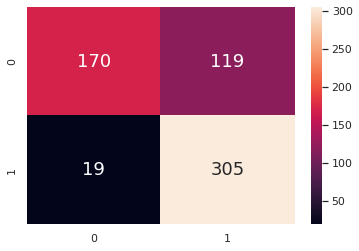

In [ ]:
print("Train Data")
printScores(dectreeCV, X_train, y_train, 'DectreeCV', 'Train', scoreslist)

Test Data
Accuracy:	 0.775609756097561
F1:	 	 0.8368794326241135
ROC_AUC:	 0.8361094286291137

TPR:	 0.9291338582677166
TNR:	 0.5256410256410257

FPR:	 0.47435897435897434
FNR:	 0.07086614173228346


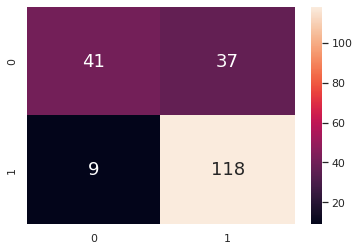

In [ ]:
print("Test Data")
printScores(dectreeCV, X_test, y_test, 'DectreeCV', 'Test', scoreslist)

### Random forest with hyperparameter tuning using GridSearchCV


The performance of the model might be improved if we used the random forest classifier instead. The random forest classifier generates specified number of decision trees with a specified max_depth, and then performs classification based on the output selected by a majority of the trees.

To ensure the best performance, we will tune the two hyperparameters with GridSearchCV.

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(random_state=42),   # the model family
                      param_grid,                 # the search grid
                      cv = 4,                     # 4-fold cross-validation
                      scoring = 'roc_auc')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HeartDisease.ravel())

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='roc_auc')

In [ ]:
# Fetch the best set of Hyper-parameters
print(hpGrid.best_params_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

{'max_depth': 3, 'n_estimators': 200}
0.8801657600015034


In [ ]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = hpGrid.best_params_['n_estimators'],   
                                 max_depth = hpGrid.best_params_['max_depth'],
                                 random_state = 42)       
# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

Train Data
Accuracy:	 0.8221859706362153
F1:	 	 0.8399412628487518
ROC_AUC:	 0.9039044811824511

TPR:	 0.8827160493827161
TNR:	 0.754325259515571

FPR:	 0.24567474048442905
FNR:	 0.11728395061728394


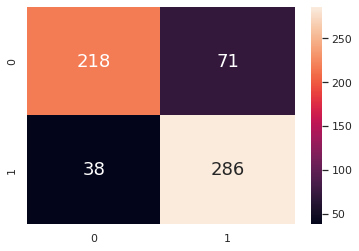

In [ ]:
print("Train Data")
printScores(rforest, X_train, y_train, 'RForestCV', 'Train', scoreslist)

Test Data
Accuracy:	 0.8146341463414634
F1:	 	 0.8560606060606061
ROC_AUC:	 0.871996769634565

TPR:	 0.889763779527559
TNR:	 0.6923076923076923

FPR:	 0.3076923076923077
FNR:	 0.11023622047244094


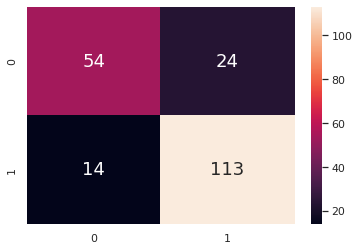

In [ ]:
print("Test Data")
printScores(rforest, X_test, y_test, 'RForestCV', 'Test', scoreslist)

Random forest classifiers appear to have better performance than singular decision trees on this problem.

### Logistic Regression with GridSearchCV

Finally, we will use logistic regression to predict the presence of heart disease. Logistic regression assumes the linearity of the variables: that the probability of the response variable being positive can be given by a linear combination of the predictor variables. This probability function is then squeezed into a sigmoid function. This function is then evaluated and optimized with a cost function to give the logistic regression model.

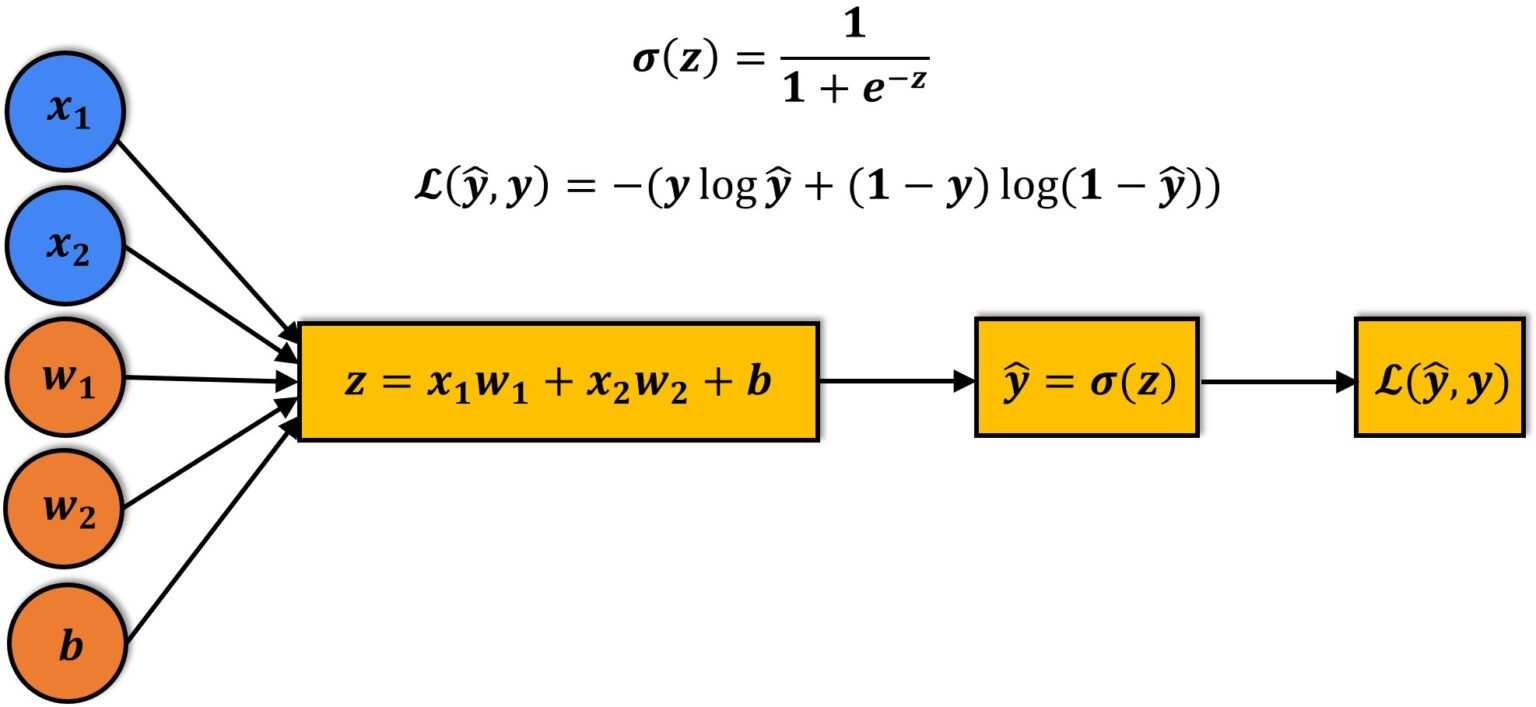

*Image from https://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/*



Logistic regression works well for binary classification problems, and one advantage is that it can generate the coefficients, ranking the importance of each variable. However, it does not work that well when the input variables are too correlated - when multicollinearity is high. In our exploratory data analysis, we have shown that there has not been too much multicollinearity, and so we have decided to use this model.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV #logicstic regression with built-in gridsearchCV parameter tuning

lgrcv = LogisticRegressionCV(cv = 4, solver='liblinear',random_state = 42)

lgrcv.fit(X_train, y_train.HeartDisease.ravel())

LogisticRegressionCV(cv=4, random_state=42, solver='liblinear')

Train Data
Accuracy:	 0.799347471451876
F1:	 	 0.8133535660091047
ROC_AUC:	 0.8907578281857405

TPR:	 0.8271604938271605
TNR:	 0.7681660899653979

FPR:	 0.23183391003460208
FNR:	 0.1728395061728395


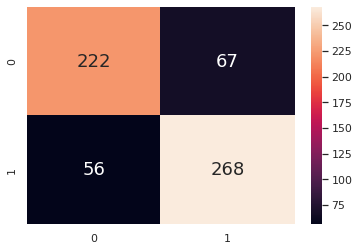

In [ ]:
print("Train Data")
printScores(lgrcv, X_train, y_train, 'LogRegCV', 'Train', scoreslist)

Test Data
Accuracy:	 0.824390243902439
F1:	 	 0.8615384615384616
ROC_AUC:	 0.8717948717948718

TPR:	 0.8818897637795275
TNR:	 0.7307692307692307

FPR:	 0.2692307692307692
FNR:	 0.11811023622047244


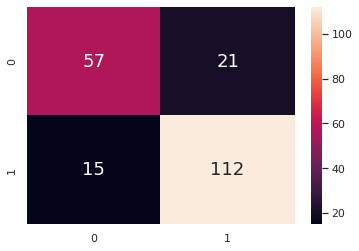

In [ ]:
print("Test Data")
printScores(lgrcv, X_test, y_test, 'LogRegCV', 'Test', scoreslist)

In [ ]:
odds = np.exp(lgrcv.coef_[0])
weights = (lgrcv.coef_[0])
coefdf = pd.DataFrame(weights,
             X.columns, 
             columns=['Coefficients'])\
            .sort_values(by='Coefficients', ascending=False)

oddsdf= pd.DataFrame(odds,
             X.columns, 
             columns=['Odds'])\
            .sort_values(by='Odds', ascending=False)

resdf = pd.concat([coefdf, oddsdf], axis = 1)
resdf

,Coefficients,Odds
CPainType_Asym,0.892046,2.440116
ExAng,0.668224,1.950769
FBSugar,0.601496,1.824846
OldPeak,0.533855,1.705495
Sex_M,0.140177,1.150477
RestECG,0.055507,1.057077
Age,0.028266,1.028669
Chol,0.004912,1.004925
RestBP,0.001081,1.001082
MaxHR,-0.010497,0.989558


The coefficients and odds represents how much a predictor variable affects the response variable, HeartDisease. 

For categorical predictors, a positive coefficient means that it there would be an increase in the risk of heart disease when that predictor is true, holding all other predictors constant. A larger number would mean a larger increase, while a negative number means that there is a decrease instead.

This increase or decrease can also be quantified by the odds: for example, the probability of a person with the asymptomatic chest pain type having heart disease is approximately 2.7 times the probability that that person does not have heart disease. 




In [ ]:
from sklearn.preprocessing import StandardScaler
stanscaler = StandardScaler()

stan_X_train = pd.DataFrame(
    stanscaler.fit_transform(X_train),
    columns = X_train.columns
)

lgrcv.fit(stan_X_train, y_train.HeartDisease.ravel())

weights2 = lgrcv.coef_[0]
coefdf2 = pd.DataFrame(weights2,
             columns=['Coefficients'])
            
namesdf = pd.DataFrame(X.columns, columns = ['Name'])

vizdf = pd.concat([namesdf,coefdf2], axis = 1).sort_values(by='Coefficients', ascending=False)
vizdf

,Name,Coefficients
10,CPainType_Asym,0.015120
7,ExAng,0.012778
4,OldPeak,0.011413
9,Sex_M,0.009467
15,STSlope_Flat,0.009146
0,Age,0.008202
1,RestBP,0.003956
2,Chol,0.003266
6,FBSugar,0.003230
14,STSlope_Down,0.002952


Standardising the model can give a better insight when comparing which variables are more important, especially between numeric and categorical variables, and obtaining the most aggravating or mitigating factors in predicting heart disease

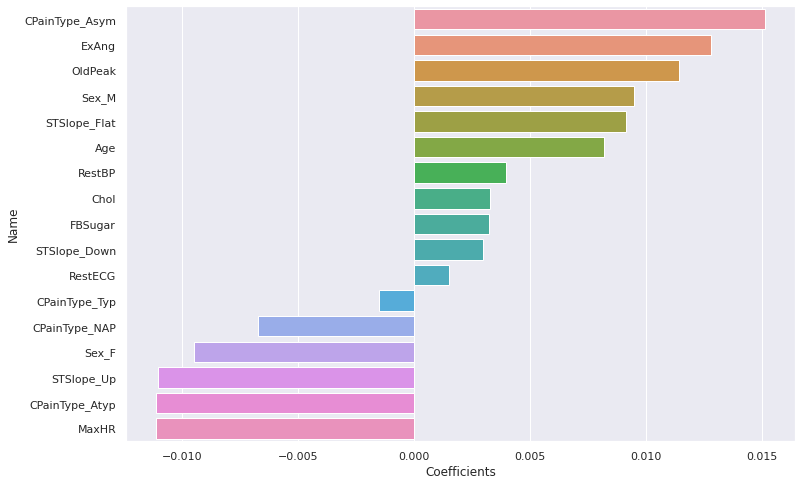

In [ ]:
plt.figure(figsize=(12, 8))

sb.barplot(x = 'Coefficients', y= 'Name',  data = vizdf, ci = None)

From our model, a few important predictors of heart disease are...
- **Chest Pain Type, particularly the presence of asymptomatic chest pain** 

- **Exercise Induced Angina**

- **Exercise induced ST Depression** 

- **ST Slope during peak exercise** 

- **Sex**


### Comparing models

In [ ]:
scores = pd.DataFrame.from_records(scoreslist)
scores

,Name,traintest,Accuracy,F1,ROC_AUC
0,Dectree,Train,0.818923,0.845188,0.885140
1,Dectree,Test,0.785366,0.839416,0.830254
2,DectreeCV,Train,0.774878,0.815508,0.855616
3,DectreeCV,Test,0.775610,0.836879,0.836109
4,RForestCV,Train,0.822186,0.839941,0.903904
5,RForestCV,Test,0.814634,0.856061,0.871997
6,LogRegCV,Train,0.799347,0.813354,0.890758
7,LogRegCV,Test,0.824390,0.861538,0.871795


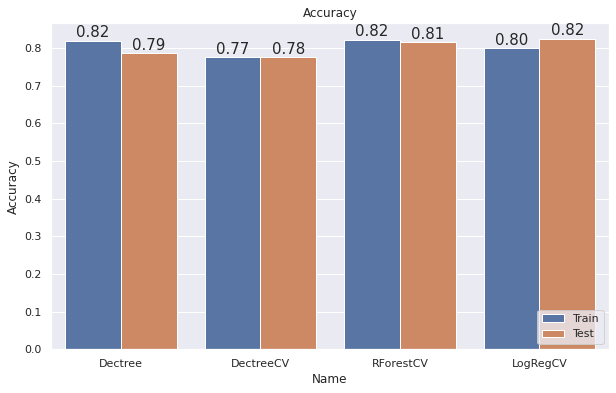

In [ ]:

plt.figure(figsize=(10, 6))

plots = sb.barplot(x= 'Name', y = 'Accuracy', hue = 'traintest', ci = None, data = scores)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.legend(loc='lower right')
plt.title("Accuracy")


plt.show()

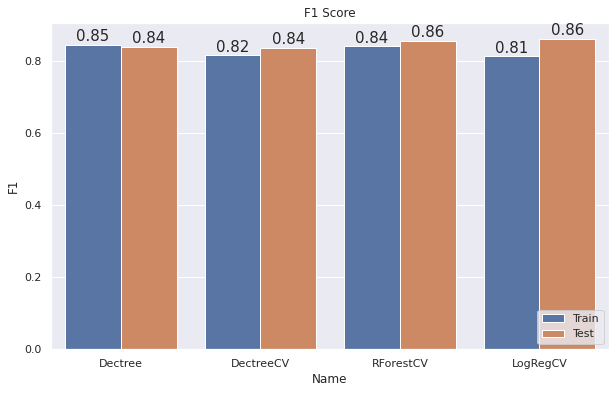

In [ ]:
plt.figure(figsize=(10, 6))
plots = sb.barplot(x= 'Name', y = 'F1', hue = 'traintest', ci = None, data = scores)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.legend(loc='lower right')
plt.title("F1 Score")


plt.show()

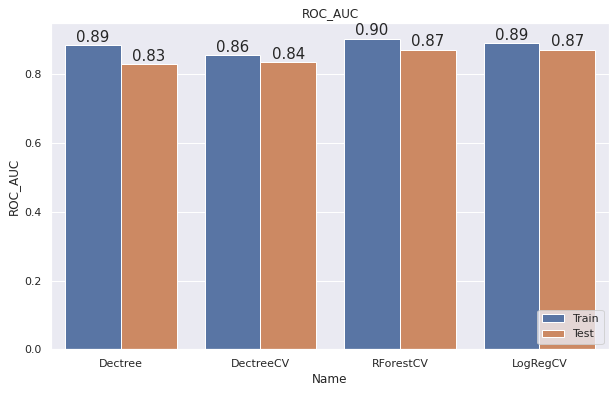

In [ ]:
plt.figure(figsize=(10, 6))
plots = sb.barplot(x= 'Name', y = 'ROC_AUC', hue = 'traintest', ci = None, data = scores)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.legend(loc='lower right')
plt.title("ROC_AUC")

plt.show()


Overall, it would seem like the random forest classifier has the best performance when predicting heart disease in this dataset. 